In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

cities = pd.read_csv("CitiesExt.csv")
players = pd.read_csv("PlayersExt.csv")

# Визуальные статистические тесты

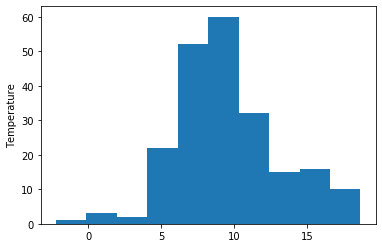

In [22]:
# Гистограмма
plt.hist(cities['temperature'])
plt.ylabel("Temperature")
plt.show()

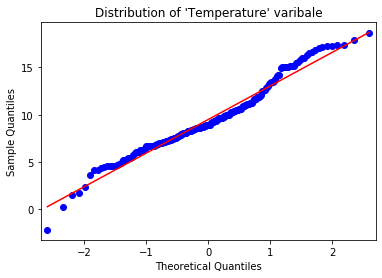

In [3]:
# Q-Q (Quantile-Quantile) Test

from statsmodels.graphics.gofplots import qqplot

qqplot(cities['temperature'], line='s')
plt.title("Distribution of 'Temperature' varibale")
plt.show()

# Тесты на нормальность

In [4]:
# Тест Шапиро-Уилка

X = cities['temperature']
stat, p = scipy.stats.shapiro(X)
alpha=0.05
print("p-value: %0.5f"%p)

if p > alpha:
    print('Data LOOKS normal (fail to reject H0)')
else:
    print('Data DOES NOT look normal (reject H0)')

p-value: 0.00035
Data DOES NOT look normal (reject H0)


In [5]:
# Тест D'Agostino's K-squared

X = cities['temperature']
stat, p = scipy.stats.normaltest(X)
alpha=0.05
print("p-value: %0.5f"%p)

if p > alpha:
    print('Data LOOKS normal (fail to reject H0)')
else:
    print('Data DOES NOT look normal (reject H0)')

p-value: 0.10219
Data LOOKS normal (fail to reject H0)


In [6]:
# Тест Колмогорова-Смирнова

X = cities['temperature']
stats, p = scipy.stats.kstest(X, 'norm', args=(np.mean(X), np.std(X)))

alpha=0.05
print("p-value: %0.5f"%p)

if p > alpha:
    print('Data LOOKS normal (fail to reject H0)')
else:
    print('Data DOES NOT look normal (reject H0)')

p-value: 0.13459
Data LOOKS normal (fail to reject H0)


In [7]:
# Тест Anderson-Darling

X = cities['temperature']
result = scipy.stats.anderson(X)
print('Statistic: %.3f' % result.statistic)

# Критические значения в статистическом тесте - это диапазон предварительно определенных границ значимости, 
# при которых H0 может быть отклонен, если расчетная статистика меньше критического значения. 
# Вместо простого p-value этот тест возвращает критическое значение для диапазона различных обычно используемых
# уровней значимости (15, 10, 5, 2.5, 1%)

# Мы можем интерпретировать результаты так:
# Мы можем НЕ В СОСТОЯНИИ ОТКЛОНИТЬ  нулевую гипотезу о том, что данные являются нормальными, 
# если рассчитанная статистика теста result.statistic меньше критического значения на выбранном уровне значимости.


for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance Level: %.3f, Critical value: %.3f, data LOOKS normal (fail to reject H0)' % (sl, cv))
    else:
        print('Significance Level: %.3f, Critical value: %.3f, data DOES NOT look normal (reject H0)' % (sl, cv))

Statistic: 2.293
Significance Level: 15.000, Critical value: 0.566, data DOES NOT look normal (reject H0)
Significance Level: 10.000, Critical value: 0.644, data DOES NOT look normal (reject H0)
Significance Level: 5.000, Critical value: 0.773, data DOES NOT look normal (reject H0)
Significance Level: 2.500, Critical value: 0.902, data DOES NOT look normal (reject H0)
Significance Level: 1.000, Critical value: 1.072, data DOES NOT look normal (reject H0)


# t-критерий Стьюдента для 1 выборки
## 1-sample t-test

In [8]:
X = cities['temperature']
print("Sample mean: ", np.mean(X))

pop_mean = 9.99
print("Assumed Population mean: ", pop_mean)

stats, p = scipy.stats.ttest_1samp(X, pop_mean)

alpha = 0.05
print(p)
if p > alpha:
    print('Fail to Reject H0: Sample mean EQUALS to the population mean of', pop_mean)
else:
    print('Reject H0: Sample mean DOES NOT EQUAL to the population mean of', pop_mean)

Sample mean:  9.497840375586858
Assumed Population mean:  9.99
0.044961602492320625
Reject H0: Sample mean DOES NOT EQUAL to the population mean of 9.99


# t-критерий c 2 выборками – Зависимый (парный)
## 2-sample t-test – Dependent (paired)

In [9]:
# Для проведения зависимого (парного) t-теста, две группы должны быть как-то связаны между собой: например, 
# пациенты до приема лекарств/ те же самые пациенты после приема лекарств; продажи товаров до промоакции/после промоакции и т.д
# Поэтому придумаем данные для 20 студентов, где первый вектор будет содержать их оценки до введения новой методики 
# преподавания, а второй - оценки после.

# Количество элементов в двух группах обязано быть одинаковым
scores_before = [18,21,16,22,19,24,17,21,23,18,14,16,16,19,18,20,12,22,15,17]
scores_after = [22,25,17,24,16,29,20,23,19,20,15,15,18,26,18,24,18,25,19,16]

stats, p = scipy.stats.ttest_rel(scores_before, scores_after)

alpha = 0.05
if p > alpha:
    print('Fail to Reject H0: Means of two groups are the same \
    \nНет никаких различий между средними значениями двух связанных групп')
else:
    print('Reject H0: Means of two groups are different \
          \nРазличия между средними значениями двух связанных групп есть')

Reject H0: Means of two groups are different           
Различия между средними значениями двух связанных групп есть


# t-критерий c 2 выборками – Независимый (непарный)
## 2-sample t-test – Independent (unpaired)

In [10]:
# Возьмем температуру только тех городов, которые находятся в Турции и Испании, и запишем их в отдельные Series
temp_Spain = cities['temperature'][cities['country'].isin(['Spain'])]
temp_Turkey = cities['temperature'][cities['country'].isin(['Turkey'])]

In [11]:
# Проведение независимого t-теста требует, чтобы данные в обоих группах были нормально распределены, 
# а также, чтобы дисперсия (variance) в группах была однородной

# Поэтому сначала проверим выборки на нормальность
stats, p1 = scipy.stats.shapiro(temp_Spain)
stats, p2 = scipy.stats.shapiro(temp_Turkey)

print("p-value for Spain: ", p1) 
print("p-value for Turkey: ", p2)

# После того, как мы удостоверились в нормальности данных, необходимо провести тест на однородность дисперсии
# Levene's test on homogeneity of variance

stats, p3 = scipy.stats.levene(temp_Spain, temp_Turkey)

alpha = 0.05

print("\nLevene's test p-value: ", p3)
if p3 > alpha:
    print('Fail to Reject H0: Homogeneity of variance CAN be assumed')
else:
    print('Reject H0: Homogeneity of variance CANNOT be assumed')

    
# Наконец, проводим независимый t-тест, чтобы определить, есть ли статистически значимая разница между 
# средними значениями в двух несвязанных группах городов. 

print("\nIndependent t-test")
stats, p = scipy.stats.ttest_ind(temp_Spain, temp_Turkey)

print("p-value: ", p)
if p > alpha:
    print('Fail to Reject H0: The means of two groups ARE NOT different')
else:
    print('Reject H0: The means of two groups ARE different')

p-value for Spain:  0.07198639959096909
p-value for Turkey:  0.8581765294075012

Levene's test p-value:  0.7673199749170561
Fail to Reject H0: Homogeneity of variance CAN be assumed

Independent t-test
p-value:  0.003961558020063635
Reject H0: The means of two groups ARE different


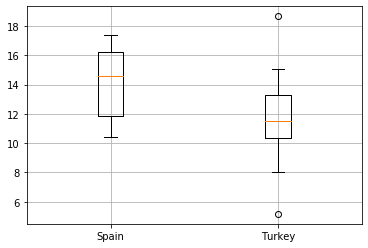

In [12]:
# Независимый  t-test показал, что средняя температура в городах Турции и Испании значительно (статистически)
# отличается друг от друга. Это также станет очевидно, если мы построим  boxplot для двух этих групп городов вместе

plt.boxplot([temp_Spain, temp_Turkey])
plt.xticks([1,2], ['Spain', 'Turkey'])
plt.grid()
plt.show()


# Односторонний дисперсионный анализ
## One-Way ANOVA Test

In [13]:
# ANOVA - это тот же самый независимый t-test, только для 3 и более разных не связанных между собой групп.

In [14]:
# Возьмем температуру только тех городов, которые находятся в Турции и Испании, и запишем их в отдельные Series
temp_Turkey = cities['temperature'][cities['country'].isin(['Turkey'])]
temp_France = cities['temperature'][cities['country'].isin(['France'])]
temp_Italy = cities['temperature'][cities['country'].isin(['Italy'])]

In [15]:
# ANOVA также опирается на предположения нормальности распределения в каждой группе, а также на однородность 
# дисперсии в группах. Поэтому, проведем тесты на нормальность

stats, p1 = scipy.stats.shapiro(temp_Turkey)
stats, p2 = scipy.stats.shapiro(temp_France)
stats, p3 = scipy.stats.shapiro(temp_Italy)

print("p-value for Turkey: ", p1) 
print("p-value for France: ", p2)
print("p-value for Italy: ", p3)

p-value for Turkey:  0.8581765294075012
p-value for France:  0.15239153802394867
p-value for Italy:  0.5013645887374878


In [23]:
# После того, как мы удостоверились в нормальности данных, 
# необходимо провести тест Левена на однородность дисперсии

stats, p = scipy.stats.levene(temp_Turkey, temp_France, temp_Italy)

alpha = 0.05

print("Levene's test p-value: ", p)
if p > alpha:
    print('Fail to Reject H0: Homogeneity of variance CAN be assumed')
else:
    print('Reject H0: Homogeneity of variance CANNOT be assumed')

Levene's test p-value:  0.12979464330296273
Fail to Reject H0: Homogeneity of variance CAN be assumed


In [17]:
# ANOVA
print("ANOVA test")
stats, p = scipy.stats.f_oneway(temp_Turkey, temp_France, temp_Italy)

print("p-value: ", p)
if p > alpha:
    print('Fail to Reject H0: The means of groups ARE THE SAME')
else:
    print('Reject H0: The means of groups ARE DIFFERENT')

ANOVA test
p-value:  0.002068479053477666
Reject H0: The means of groups ARE DIFFERENT


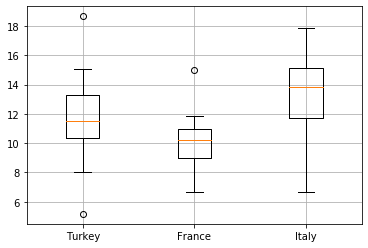

In [18]:
# ANOVA тест показал, что средняя температура в городах Турции, Франции и Италии значительно (статистически)
# отличается друг от друга. Это также станет очевидно, если мы построим  boxplot для трех этих групп городов вместе

plt.boxplot([temp_Turkey, temp_France, temp_Italy])
plt.xticks([1,2,3], ['Turkey', 'France', 'Italy'])
plt.grid()
plt.show()

# Критерий хи-квадрат
## Chi-Square Test

In [19]:
# Chi-squared тест для переменных из датасета  cities

X = cities['EU']
Y = cities['coastline']

# Составим таблицу сопряженности (contingency table) для двух категориальных переменных
t = pd.crosstab(X, Y)
print("Contingency table\n", t)

stat, p, dof, expected = scipy.stats.chi2_contingency(t)

print("\nОжидаемые значения для каждой группы:\n", expected)

print("\np-value: ", p)

alpha = 0.05
if p > alpha:
    print('Fail to Reject H0: There is NO association between the variables ')
else:
    print('Reject H0: Some association between variables DOES EXIST')

Contingency table
 coastline  no  yes
EU                
no         16   47
yes        14  136

Ожидаемые значения для каждой группы:
 [[  8.87323944  54.12676056]
 [ 21.12676056 128.87323944]]

p-value:  0.0042361835936148345
Reject H0: Some association between variables DOES EXIST


In [20]:
# Chi-squared тест для переменных из датасета  players

X = players['team']
Y = players['position']

# Составим таблицу сопряженности (contingency table) для двух категориальных переменных
t = pd.crosstab(X, Y)
print("Contingency table\n", t)

stat, p, dof, expected = scipy.stats.chi2_contingency(t)

print("\nОжидаемые значения для каждой группы:\n", expected)

print("\np-value: ", p)


alpha = 0.05
if p > alpha:
    print('Fail to Reject H0: There is NO association between the variables ')
else:
    print('Reject H0: Some association between variables DOES EXIST')

Contingency table
 position      defender  forward  goalkeeper  midfielder
team                                                   
Algeria              4        3           2           9
Argentina            6        6           1           7
Australia            4        3           1          11
Brazil               6        4           1           8
Cameroon             8        5           1           6
Chile                7        5           1           7
Denmark              4        3           1          11
England              6        4           2           7
France               6        5           1           7
Germany              6        6           1           6
Ghana                7        5           1           6
Greece               8        5           1           5
Honduras             6        5           1           7
Italy                5        6           2           6
Ivory Coast          5        5           1           5
Japan                5       